# SIMULACIONES

Empezamos con un problema sencillo:

El del coche y las cabras y las tres puertas.

Eliges una, y el presentador abre otra con una cabra (él sabe dónde están). Después te ofrece cambiar de puerta, qué hay que hacer?

Vamos a hacer un experimento a ver qué sale

In [1]:
import random
import seaborn as sns
%matplotlib inline

In [2]:
# Asumimos que los números aleatorios que queremos reproducir siguen una distribución uniforme
random.random()

0.47202206899204

In [3]:
random.randint(1,56)

27

In [4]:
# De una lista, escoge un elemento de una manera aleatoria uniforme

random.choice([1,2,3])

2

In [5]:
# Ejemplo: vamos a elegir un n. del 1 al 10, y comprobar las probs. de elegir cada uno

casos = list(range(1,11))
casos

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [6]:
random.choice(casos)

2

In [7]:
N = 6
for k in range(N):
    print(random.choice(casos))

8
6
4
10
4
4


In [8]:
# Mediante un diccionario vamos a obtener cuántas veces sale cada número

d = {}

for c in casos:
    d[c] = 0
    
N = 10000

resultados = []
for k in range (N):
    r = random.choice(casos)
    d[r] += 1
    resultados.append(r)

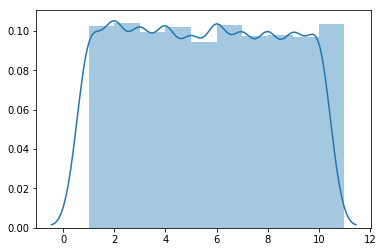

In [9]:
sns.distplot(resultados, bins = casos + [11])

Vemos que es uniforme. OK.

Ahora, el experimento de las puertas:

In [24]:
# Creamos una lista que representa las puertas

puertas = [0,1,0]

puerta = random.choice(range(len(puertas)))
print("El concursante elige la puerta %d" % puerta)

# El presentador te enseña una puerta con una cabra: no puede enseñarte la del coche, ni la tuya.

# Cuáles puede elegir?

primera_puerta = puertas.index(0) # Me da la primera puerta que sea un 0.
segunda_puerta = puertas.index(0, primera_puerta+1) # Me da la otra que sea un 0, a partir de la siguiente posición

puertas_presentador = set([primera_puerta, segunda_puerta]) - set([puerta])

puertas_presentador

El concursante elige la puerta 1


{0, 2}

In [102]:
# Ahora hay que implementar la estrategia: no cambiar de puerta.
presenta = random.choice(list(puertas_presentador))
print("El presentador muestra la puerta %d " % presenta)

El presentador muestra la puerta 2 


In [106]:
# Cómo sabemos si ha ganado? Viendo el contenido

# Primero podemos hacer un check de que lo hemos hecho bien -> la puerta que le enseña no es la que ha elegido
assert puerta != presenta # Y no peta, #

ha_ganado = (puertas[puerta] == 1)
print(ha_ganado)

True


In [133]:
# Lo juntamos todo:
puertas = [0,1,0]

def jugar(puertas):

    puerta = random.choice(range(len(puertas)))
    # print("El concursante elige la puerta %d" % puerta)

    primera_puerta = puertas.index(0)
    segunda_puerta = puertas.index(0, primera_puerta+1)

    puertas_presentador = set([primera_puerta, segunda_puerta]) - set([puerta])
    presenta = random.choice(list(puertas_presentador))
    # print("El presentador muestra la puerta %d " % presenta)

    assert puerta != presenta # Y no peta, #

    ha_ganado = (puertas[puerta] == 1)
    
    return ha_ganado

In [134]:
jugar([0,1,0])

# Tengo una función que me devuelve si gana o no cuando no cambia de puerta.

False

In [184]:
# Lo simulamos muchas veces y metemos el experimento en una función.

def experimento(N, puertas, cambia):

    puertas = [0,1,0]
    N = 10000
    aciertos = 0

    for k in range(N):
        r = jugar ([0,1,0], cambia)
        if r:
            aciertos +=1
    
    return aciertos/N
    
    

In [ ]:
# Esto es un experimento

experimento(10000, [0,1,0],)

In [189]:
# Ahora lo repito n veces.

experimentos = [experimento (100, [0,1,0], True) for k in range(1000)]

KeyboardInterrupt: 

In [ ]:
# Ahora vamos a implementar el cambiar de puerta

In [ ]:
def jugar(puertas, cambia=False):

    puerta = random.choice(range(len(puertas)))
    # print("El concursante elige la puerta %d" % puerta)

    primera_puerta = puertas.index(0)
    segunda_puerta = puertas.index(0, primera_puerta+1)

    puertas_presentador = set([primera_puerta, segunda_puerta]) - set([puerta])
    presenta = random.choice(list(puertas_presentador))
    # print("El presentador muestra la puerta %d " % presenta)

    assert puerta != presenta # Y no peta, #

    puerta_cambiada_set = set([0,1,2]) - set([puerta, presenta])
    puerta_cambiada = puerta_cambiada_set.pop()
    
    if cambia:
        puerta = puerta_cambiada
    
    ha_ganado = (puertas[puerta] == 1)
    
    return ha_ganado

In [ ]:
jugar([0,1,0])

In [183]:
experimento(100, [0,1,0], True)

0.3363

## Versión final:

In [27]:
def jugar(puertas, cambia=False):
    assert len(puertas) == 3
    
    puerta = random.choice(range(len(puertas)))
    #print("El concursante elige la puerta %d" % puerta)

    primera_puerta = puertas.index(0)
    segunda_puerta = puertas.index(0,primera_puerta + 1)
    
    puertas_presentador = set([primera_puerta, segunda_puerta]) - set([puerta])
    presenta = random.choice(list(puertas_presentador))
    #print("El presentador muestra la puerta %d" % presenta)

    assert puerta != presenta
    
    puerta_cambiada_set = set([0,1,2]) - set([puerta, presenta])
    puerta_cambiada = puerta_cambiada_set.pop()
    
    if cambia:
        puerta = puerta_cambiada
    
    assert puerta in (set([0,1,2]) - set([presenta]))
                                     
    ha_ganado = (puertas[puerta] == 1)
    
    return ha_ganado

In [28]:
jugar([0,1,0], True)

False

In [29]:
def experimento(N, puertas, cambia):

    aciertos = 0
    for k in range(N):
        r = jugar([0,1,0], cambia)
        if r:
            aciertos += 1
            
    return aciertos/N

In [30]:
experimento(1000, [0,1,0], True)

0.66

In [31]:
experimentos_sin_cambiar = [experimento(1000, [0,1,0], False) for k in range(1000)]
experimentos_con_cambio = [experimento(1000, [0,1,0], True) for k in range(1000)]

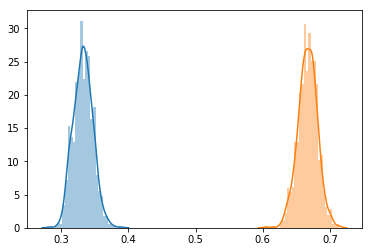

In [32]:
sns.distplot(experimentos_sin_cambiar); sns.distplot(experimentos_con_cambio)

In [190]:
# Ejercicio: cada uno de nosotros tiene un sitio en el aula y hay 15 sitios. Siempre llega primero Isabel, y elige cómo se sienta
# como le apetece (probabilidad uniforme)
# Todos los demás se sientan en su sitio si pueden, si no en otro al azar.
# Al final ramón llega y se sienta donde puede. ¿Cuál es la probabilidad de que sea en su sitio?

In [ ]:
# Crear una función que sea rellenar sitios que devuelva si Ramón se ha sentado en su sitio o no. Con eso hacemos un experimento.